<h1>RED WINE MODEL</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.svm import SVC

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
df = pd.read_csv('winequality-red.csv')

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
#OBSERVATIONS 
# There are no null values present in the dataset
# There may be some outliers present in the residual sugar, free sulfur dioxide columns but we will not remove them

<Axes: >

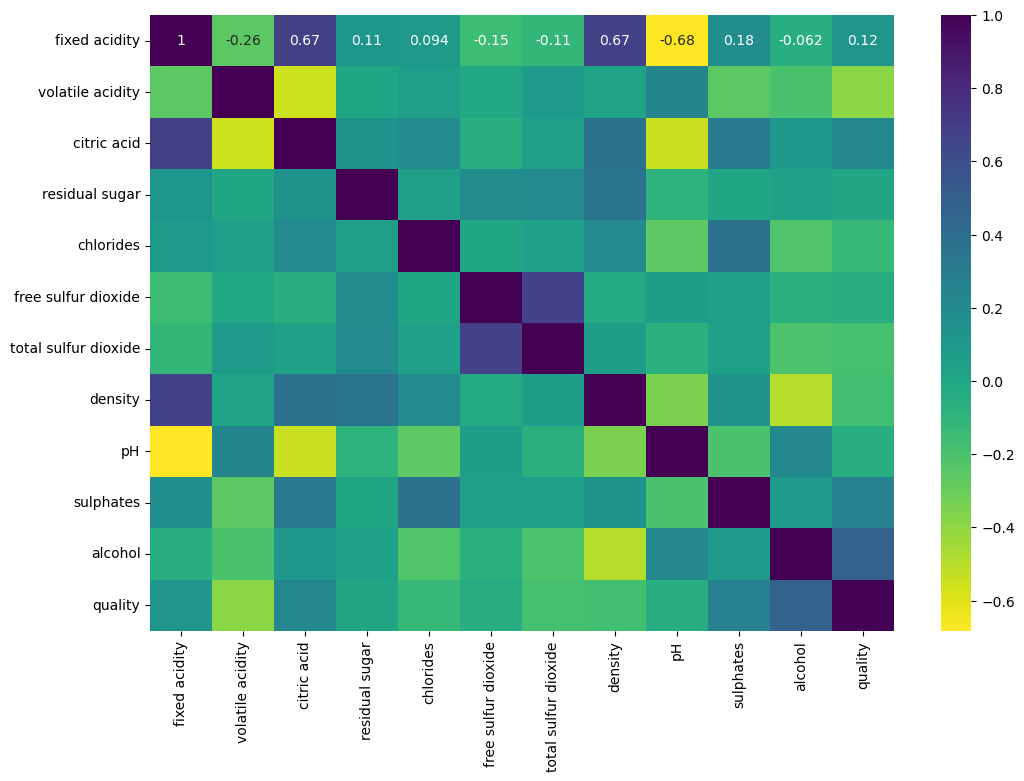

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis_r')

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [16]:
#OBSERVATION
# Its clear from the heatmap that there are no two dependent variables or features that are closely related to each other.

/home/devesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/devesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/devesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/devesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

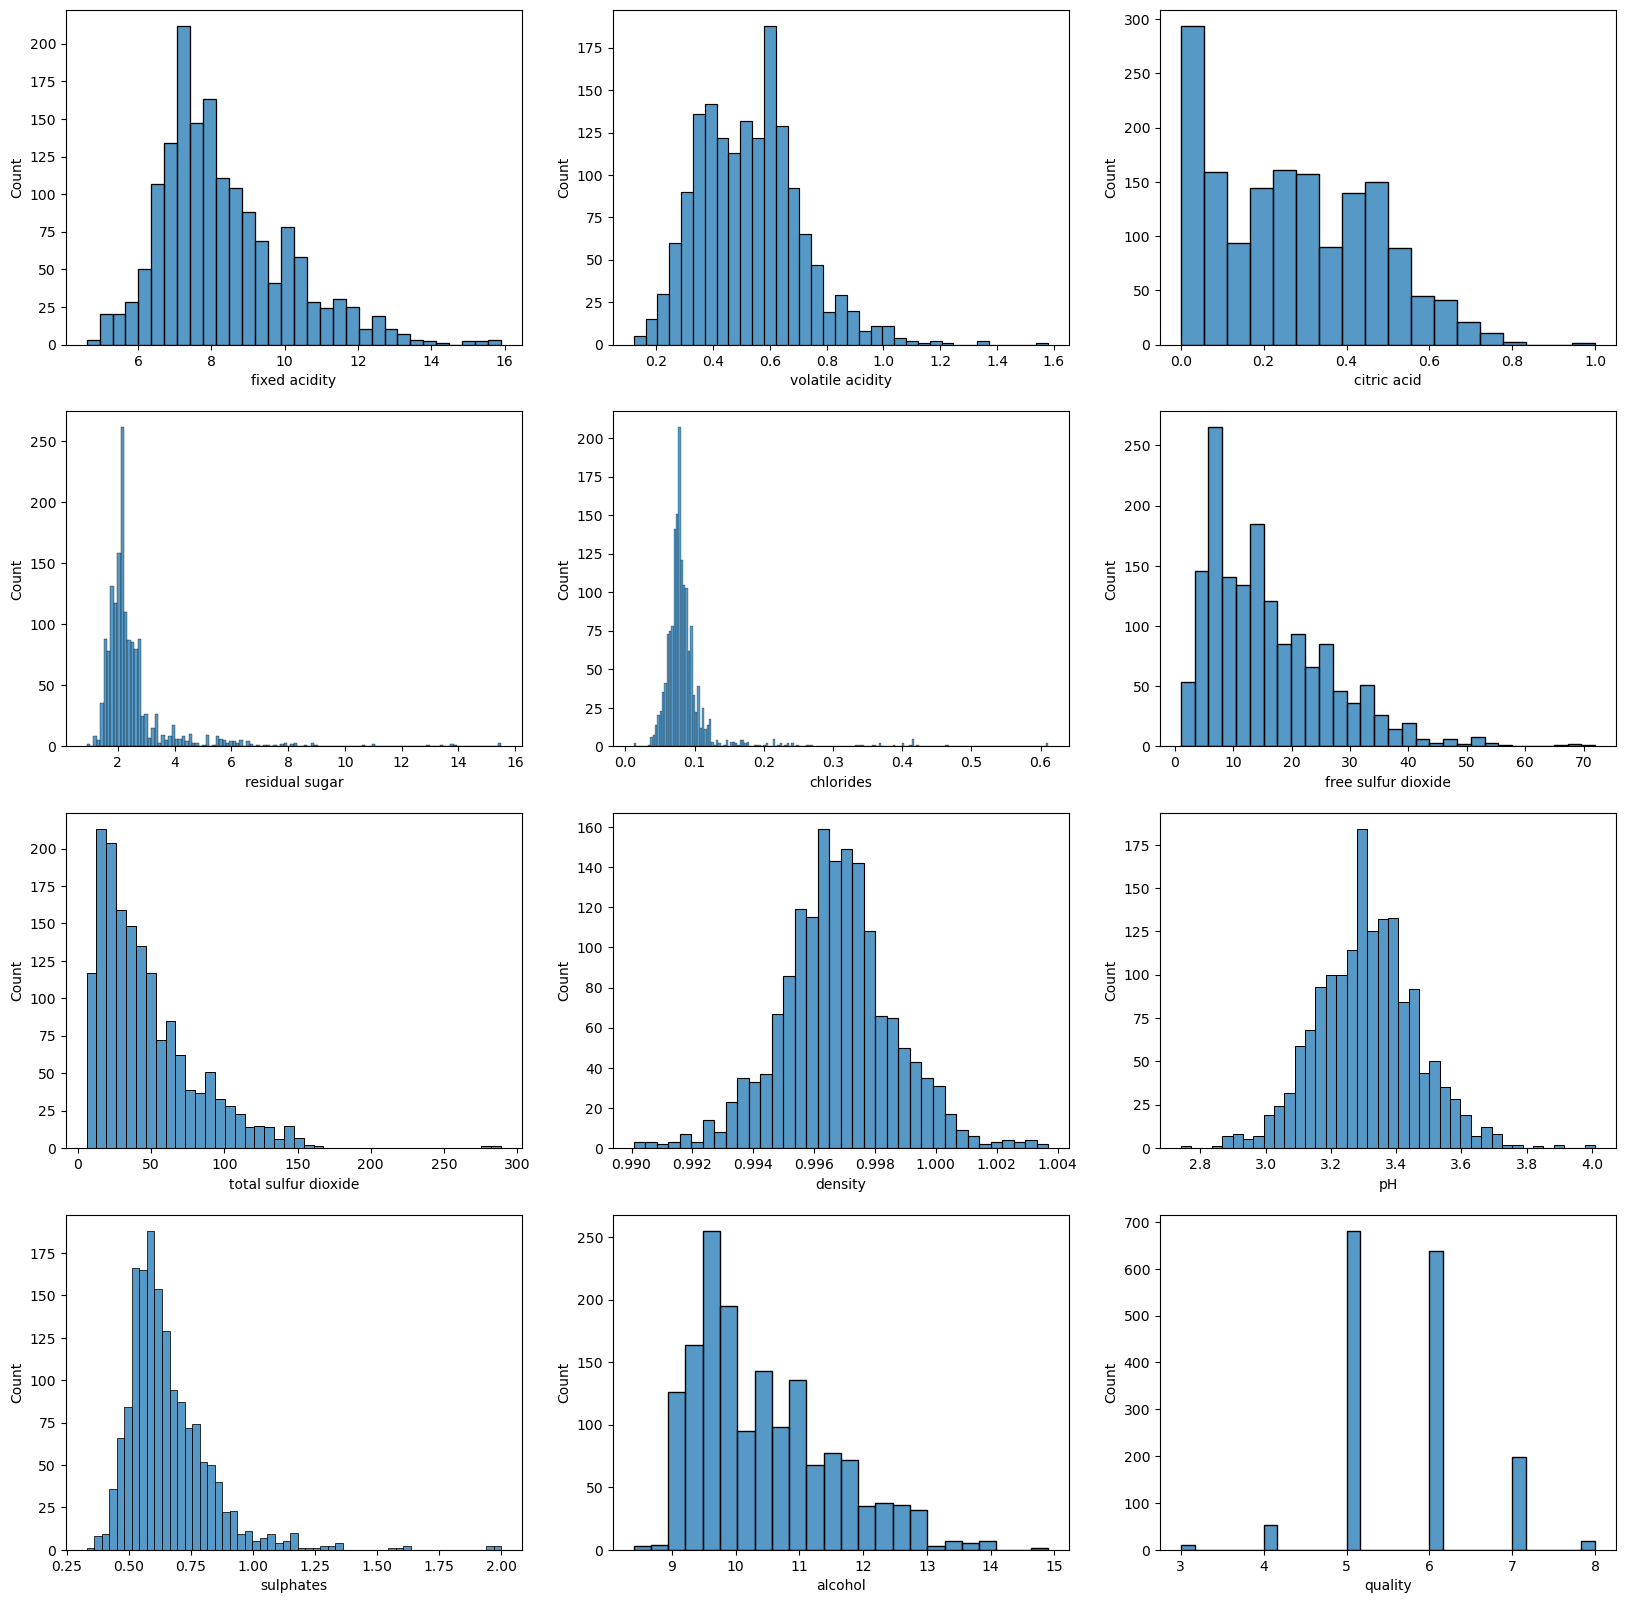

In [17]:
fig, axes = plt.subplots(4,3,figsize=(20,20))
plotnumber = 1
for i in df.columns:
    axes = plt.subplot(4,3, plotnumber)
    sns.histplot(data=df, x=i)
    plotnumber+=1

In [18]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [19]:
# We have to use classification model for this problem as we have to predict the red wine quality

In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


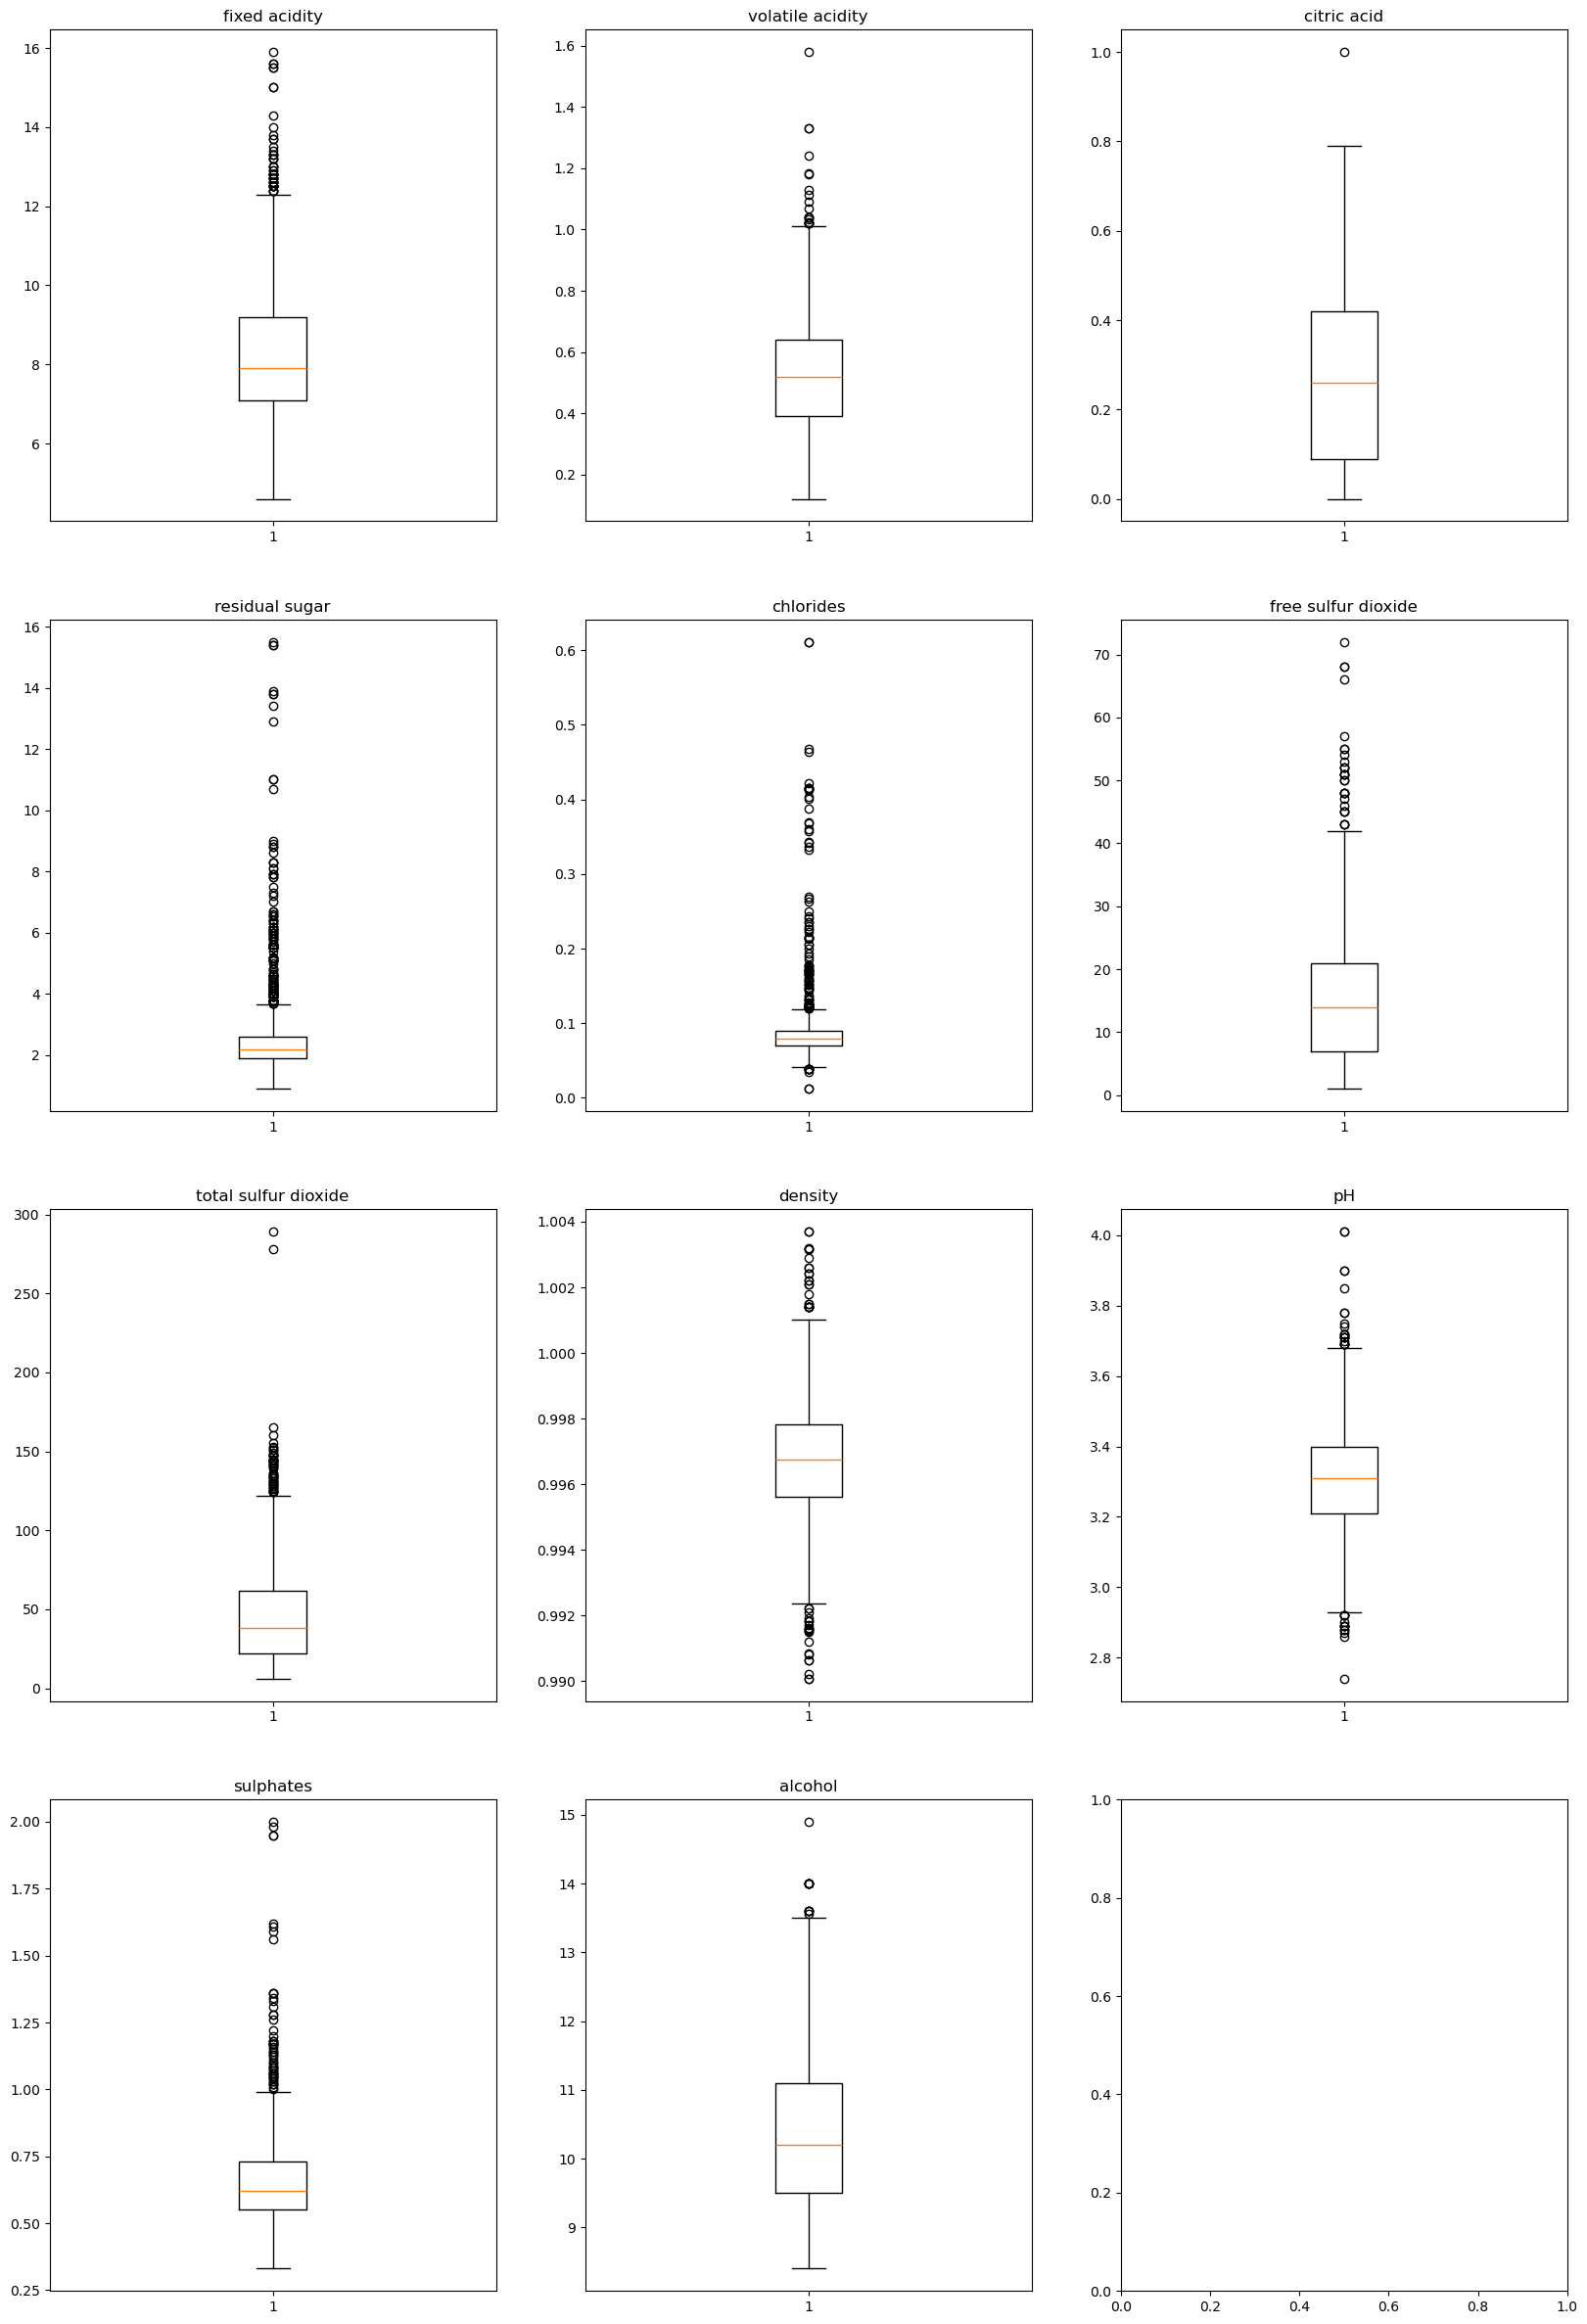

In [21]:
fig, axes = plt.subplots(4,3,figsize=(20,30))
plotnumber = 1
for i in df.columns[:-1]:
    axes = plt.subplot(4,3,plotnumber)
    axes.boxplot(data=df, x=i)
    plt.title(i)
    plotnumber += 1

In [22]:
#AS you can see there are many outliers present in the residual sugar column, so we will not remove them in this project

<Axes: xlabel='quality', ylabel='count'>

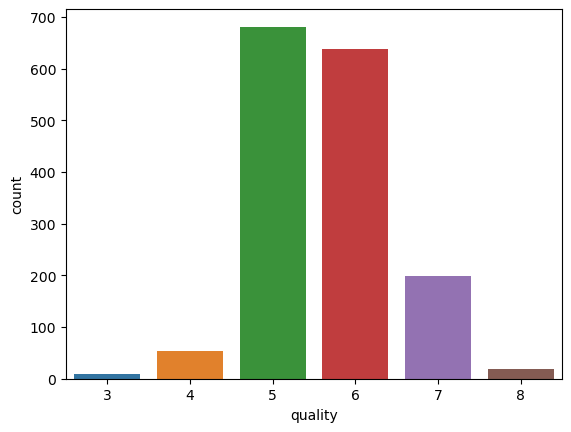

In [23]:
sns.countplot(data=df, x='quality')

In [24]:
#As said we should create two classification values 1 which contains wine quality >= 7 and 0 which contains wine quality < 7

In [25]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
df['quality value'] = df['quality'].apply(lambda x: 1 if x>=7 else 0)

In [27]:
df['quality value']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality value, Length: 1599, dtype: int64

<Axes: xlabel='quality value', ylabel='count'>

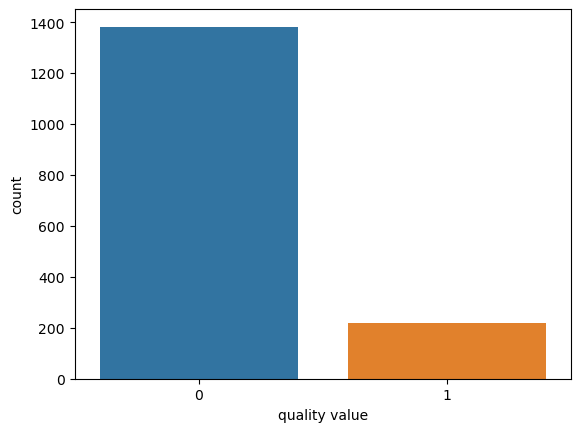

In [28]:
sns.countplot(data=df, x='quality value')

In [29]:
# wine quality value 1 means the wine is good and 0 means wine is not good

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
X = df.drop(['quality', 'quality value'], axis=1)
y = df['quality value']

In [32]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [33]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality value, Length: 1599, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(X_train)

StandardScaler()

In [38]:
X_train = scaler.transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [41]:
X_test

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]])

In [42]:
X_train = pd.DataFrame(X_train, columns=df.columns[:-2])

In [43]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
4,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358
...,...,...,...,...,...,...,...,...,...,...,...
1274,0.450408,0.387494,-1.394630,-0.456703,-0.617442,-1.054958,-1.113215,0.499144,-0.855116,-0.172018,-0.017201
1275,-0.071764,0.582801,-0.882784,-0.317352,-0.313264,0.885003,0.405199,-0.212363,-0.140623,0.515517,0.457957
1276,-0.651956,0.499098,-1.087522,0.100700,-0.232149,-0.084978,1.164407,0.369779,1.288361,-0.687670,-0.872484
1277,-0.245822,-1.844584,0.396831,-0.596054,-0.698557,-0.860962,-0.961374,-1.182601,0.054238,0.801991,1.408272


In [44]:
X_test = pd.DataFrame(X_test, columns=df.columns[:-2])

In [45]:
smote = SMOTE(random_state=42)

In [46]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [47]:
X_train.shape

(2218, 11)

In [48]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
4,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358
...,...,...,...,...,...,...,...,...,...,...,...
2213,0.275206,-0.144011,-0.811320,-0.038651,0.062794,0.357753,0.071148,0.480468,0.078026,1.045912,0.110758
2214,0.406016,-1.127473,0.734442,2.382215,-0.313264,-0.889866,-1.022110,-0.022643,-0.143413,-0.058584,1.669129
2215,-1.717586,0.884422,-0.823722,-0.574201,-0.909862,-0.192305,1.442395,-2.357666,1.305655,1.052190,2.358587
2216,-0.014657,-1.079720,0.640158,-0.316257,-0.567543,-0.957960,-1.098270,-0.788692,0.053217,0.128553,0.859973


In [49]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
2213    1
2214    1
2215    1
2216    1
2217    1
Name: quality value, Length: 2218, dtype: int64

In [50]:
lrmodel = LogisticRegression()

In [51]:
lrmodel.fit(X_train, y_train)

LogisticRegression()

In [52]:
lrpred = lrmodel.predict(X_test)

In [53]:
print(classification_report(y_test, lrpred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       273
           1       0.42      0.89      0.57        47

    accuracy                           0.80       320
   macro avg       0.70      0.84      0.72       320
weighted avg       0.90      0.80      0.83       320



In [54]:
confusion_matrix(y_test, lrpred)

array([[215,  58],
       [  5,  42]])

In [55]:
accuracy_score(y_test, lrpred)

0.803125

In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
rfc_pred = rfc.predict(X_test)

In [59]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       273
           1       0.71      0.72      0.72        47

    accuracy                           0.92       320
   macro avg       0.83      0.84      0.83       320
weighted avg       0.92      0.92      0.92       320



In [60]:
print(confusion_matrix(y_test, rfc_pred))

[[259  14]
 [ 13  34]]


In [61]:
print(accuracy_score(y_test, rfc_pred))

0.915625


In [62]:
svc = SVC()

In [63]:
svc.fit(X_train, y_train)

SVC()

In [64]:
svc_pred = svc.predict(X_test)

In [65]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       273
           1       0.49      0.85      0.62        47

    accuracy                           0.85       320
   macro avg       0.73      0.85      0.77       320
weighted avg       0.90      0.85      0.86       320



In [66]:
print(confusion_matrix(y_test, svc_pred))

[[232  41]
 [  7  40]]


In [67]:
print(accuracy_score(y_test, svc_pred))

0.85


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gbc = GradientBoostingClassifier()

In [70]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [71]:
gbc_pred = gbc.predict(X_test)

In [72]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       273
           1       0.62      0.85      0.72        47

    accuracy                           0.90       320
   macro avg       0.80      0.88      0.83       320
weighted avg       0.92      0.90      0.91       320



In [80]:
print(confusion_matrix(y_test,gbc_pred))

[[249  24]
 [  7  40]]


In [81]:
print(accuracy_score(y_test,gbc_pred))

0.903125


In [82]:
from xgboost import XGBClassifier

In [83]:
xgb = XGBClassifier()

In [84]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
xgb_pred = xgb.predict(X_test)

In [86]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       273
           1       0.63      0.70      0.67        47

    accuracy                           0.90       320
   macro avg       0.79      0.82      0.80       320
weighted avg       0.90      0.90      0.90       320



In [87]:
print(confusion_matrix(y_test, xgb_pred))

[[254  19]
 [ 14  33]]


In [88]:
print(accuracy_score(y_test, xgb_pred))

0.896875


In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtc = DecisionTreeClassifier()

In [91]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
dtc_pred = dtc.predict(X_test)

In [93]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       273
           1       0.49      0.60      0.54        47

    accuracy                           0.85       320
   macro avg       0.71      0.74      0.72       320
weighted avg       0.86      0.85      0.86       320



In [94]:
print(confusion_matrix(y_test, dtc_pred))

[[244  29]
 [ 19  28]]


In [95]:
print(accuracy_score(y_test, dtc_pred))

0.85


In [96]:
# AS you can see we have tested various classification models like Logistic Regression
# XGB, etc but gradient boosting gives the best accuracy of 90% without any hyperparamter tuning
# So, we will use GradientBoostingClassifier

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
parameters = {
    'learning_rate':[0.01,0.025,0.05,0.075,0.1,0.15,0.2],
    'min_samples_split':[10,20,30],
    'min_samples_leaf':[10,20,30],
    'max_depth':[5,10,15],
    'max_features':[6,8,10,11],
    'n_estimators':[10,20,30]
}

In [99]:
grid = GridSearchCV(estimator=gbc,param_grid=parameters,scoring='accuracy',n_jobs=-1,cv=5,verbose=4)

In [100]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2268 candidates, totalling 11340 fits
[CV 2/5] END learning_rate=0.01, max_depth=5, max_features=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10;, score=0.885 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=5, max_features=6, min_samples_leaf=10, min_samples_split=20, n_estimators=30;, score=0.836 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=5, max_features=6, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.858 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=5, max_features=6, min_samples_leaf=20, min_samples_split=10, n_estimators=30;, score=0.874 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=5, max_features=6, min_samples_leaf=20, min_samples_split=30, n_estimators=30;, score=0.867 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=5, max_features=6, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.845 total time=   0.2s
[CV 1/5] E

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [5, 10, 15],
                         'max_features': [6, 8, 10, 11],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy', verbose=4)

In [101]:
grid

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [5, 10, 15],
                         'max_features': [6, 8, 10, 11],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy', verbose=4)

In [102]:
grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 30}

In [103]:
gbc = grid.best_estimator_

In [104]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=15, max_features=10,
                           min_samples_leaf=10, min_samples_split=20,
                           n_estimators=30)

In [105]:
grid.best_score_

0.9441044882354138

In [106]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_depth=15, max_features=10,
                           min_samples_leaf=10, min_samples_split=20,
                           n_estimators=30)

In [107]:
y_predgbc = grid.predict(X_test)

In [108]:
print(classification_report(y_test,y_predgbc))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       273
           1       0.70      0.79      0.74        47

    accuracy                           0.92       320
   macro avg       0.83      0.86      0.85       320
weighted avg       0.92      0.92      0.92       320



In [109]:
print(confusion_matrix(y_test,y_predgbc))

[[257  16]
 [ 10  37]]


In [111]:
print(accuracy_score(y_test,y_predgbc))

0.91875


In [112]:
gbc = grid.best_estimator_

In [113]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=15, max_features=10,
                           min_samples_leaf=10, min_samples_split=20,
                           n_estimators=30)

In [114]:
predictions = gbc.predict(X_test)

In [115]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       273
           1       0.65      0.77      0.71        47

    accuracy                           0.91       320
   macro avg       0.81      0.85      0.83       320
weighted avg       0.91      0.91      0.91       320



In [116]:
confusion_matrix(y_test,predictions)

array([[254,  19],
       [ 11,  36]])

In [117]:
accuracy_score(y_test,predictions)

0.90625

In [118]:
#Saving the model

In [8]:
import joblib

In [120]:
joblib.dump(gbc,'gbcmodel.pkl')

['gbcmodel.pkl']

In [121]:
#We have built a model that predicts the wine quality 0 or 1 and saved the model for further use

In [7]:
#We will load model and test it

In [18]:
import warnings
warnings.filterwarnings(action='ignore')

In [19]:
model = joblib.load(filename='gbcmodel.pkl')

In [20]:
input = (7.15,0.637,0.0,1.7,0.065,14.5,21.0,0.9946,3.89,0.38,10.0)

In [21]:
inputdata = np.asarray(input)

In [22]:
inputdata = inputdata.reshape(1,-1)

In [23]:
model.predict(inputdata)

array([0])

In [24]:
#The model has predicted the wine belongs to quality 0